Deterministic SIR model:

\begin{eqnarray}
\frac{dS}{dt} &=& -aS\frac{I}{N}\\
\frac{dI}{dt} &=& aS\frac{I}{N} - bI\\
\frac{dR}{dt} &=& bI
\end{eqnarray}

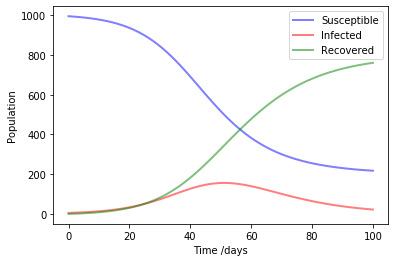

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 5, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
a, b = 0.2, 0.1
# A grid of time points (in days)
T = 100
dt = 1
t = np.linspace(0, T, np.int(T/dt))

# The SIR model differential equations.
def deriv(y, t, N, a, b):
    S, I, R = y
    dSdt = -a * S * I/N 
    dIdt = a * S * I/N   - b * I
    dRdt = b * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, a, b))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population')
#plt.ylim(0,1.2)

plt.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()
#legend.get_frame().set_alpha(0.5)
plt.show()

Reproduction number: $Ro = \frac{aN}{S(0)b}$

In [12]:
a*N/y0[0]/b #reproduction number

2.0100502512562812

Stochastic SIR (a Markov chain in some sense...)

In [13]:
def onestep(N,S,I,R,a,b,dt):
    for i in range(S):
        if np.random.random_sample() <a*I*dt/N:
            S, I = S-1, I+1
    for i in range(I):
        if np.random.random_sample() < b*dt:
            I, R = I-1, R+1
            
    return S, I, R

In [14]:

#S, I, R = S0, I0, R0
X = [[S0, I0, R0]]
for i in range(np.shape(t)[0]):
    #print(i)
    #S, I, R = onestep(N,S,I,R,a,b,dt)
    #X = X+ [ [S,I,R]  ]
    X = X + [ onestep(N,X[i][0], X[i][1], X[i][2],a,b,dt)  ]
X = np.asarray(X)
Sd = np.asarray([X[i][0] for i in range(np.shape(t)[0])])
Id = np.asarray([X[i][1] for i in range(np.shape(t)[0])])
Rd = np.asarray([X[i][2] for i in range(np.shape(t)[0])])

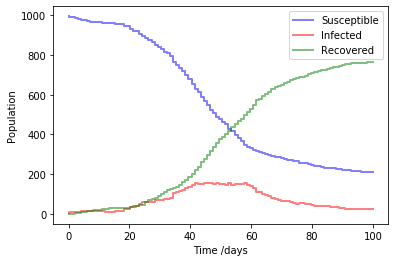

In [5]:
fig = plt.figure(facecolor='w')
N = np.float(N)
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.step(t, Sd, 'b',  alpha=0.5, lw=2, label='Susceptible')
plt.step(t, Id, 'r',  alpha=0.5, lw=2, label='Infected')
plt.step(t, Rd, 'g',  alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population')
plt.legend()